In [2]:
import pandas as pd
import matplotlib.pyplot as plt #visualisasi data
import numpy as np #proses nilai numerik
import seaborn as sns #visualisasi data
import scipy.stats as stats
import re

In [3]:
df_consumption = pd.read_excel("DATASET_cultural dimension of food consumption.xlsx")

In [4]:
df_consumption.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 710 entries, 0 to 709
Data columns (total 28 columns):
 #   Column                                                                 Non-Null Count  Dtype 
---  ------                                                                 --------------  ----- 
 0   (A1) CITY                                                              710 non-null    object
 1   (A2) PROVINCE                                                          710 non-null    object
 2   (B3) GENDER                                                            710 non-null    object
 3   (B4) AGE                                                               710 non-null    int64 
 4   (B5) RELIGION                                                          710 non-null    object
 5   (B6) ETHNIC                                                            710 non-null    object
 6   (B7) EDUCATION LEVEL                                                   710 non-null    object
 7  

In [5]:
len(df_consumption.drop_duplicates()) / len(df_consumption)
#jika output dari code di cell ini tidak bernilai 1 maka terdapat duplikat

1.0

## Data Cleaning Review

1. Tidak ada missing value ketika dicek dengan fungsi isna
2. Tidak ada duplikated data pada dataset ini

In [6]:
df_consumption.head()

,(A1) CITY,(A2) PROVINCE,(B3) GENDER,(B4) AGE,(B5) RELIGION,(B6) ETHNIC,(B7) EDUCATION LEVEL,(B8) LIVED IN URBAN AREA (YEARS),(B9) OCCUPATION,(B10) SOCIAL CLAS,...,(E19) RELIGIOUS VALUE IN EATING PLACES,(E20) RELIGIOUS VALUE IN CONSUMPTION PATTERN,(E21) CUSTOM VALUE IN TYPE OF FOOD,(E22) CUSTOM VALUE IN EATING PLACES,(E23) CUSTOM VALUE IN CONSUMPTION PATTERN,(24) PRACTICE OF FOOD CONSUMPTION BASED ON RELIGIOUS RULES,(25) PRACTICE OF FOOD CONSUMPTION BASED ON CUSTOM RULES,(E26) BUYING FOOD PRODUCT IN THE RIGHT PLACE BASED ON RELIGIOUS RULES,(E27 TYPE OF DISHES VARIATION BASED ON RELIGIOUS RULES,(E28) PRACTICE OF CONSUMING TRADITIONAL FOOD
0,Jakarta,DKI Jakarta,Female,31,Islam,Java,Senior High School,31,Private Employees,Lower Class,...,Neither agree nor disagree,Agree,Strongly Agree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Disagree,Neither agree nor disagree,Agree,Agree
1,Jakarta,DKI Jakarta,Female,36,Islam,Java,Bachelor degree,32,Private Employees,Lower Class,...,Agree,Agree,Strongly Agree,Agree,Agree,Disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Strongly Agree
2,Jakarta,DKI Jakarta,Male,24,Islam,Java,Senior High School,24,Private Employees,Middle Class,...,Agree,Neither agree nor disagree,Neither agree nor disagree,Disagree,Agree,Disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree
3,Jakarta,DKI Jakarta,Female,63,Islam,Other,Senior High School,32,Private Employees,Lower Class,...,Agree,Neither agree nor disagree,Agree,Neither agree nor disagree,Agree,Agree,Neither agree nor disagree,Disagree,Neither agree nor disagree,Agree
4,Jakarta,DKI Jakarta,Male,43,Protestant,Batak,Primary School,43,Government Employees,Lower Class,...,Strongly Agree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Strongly Agree,Strongly Agree,Agree,Disagree,Agree,Agree


In [7]:
# Misalnya, lihat distribusi nilai religius terhadap jenis makanan
df_consumption['(E18) RELIGIOUS VALUE IN TYPE OF FOOD'].value_counts()

(E18) RELIGIOUS VALUE IN TYPE OF FOOD
Strongly Agree                391
Agree                         194
Neither agree nor disagree    116
Disagree                        8
Strongly Disagree               1
Name: count, dtype: int64

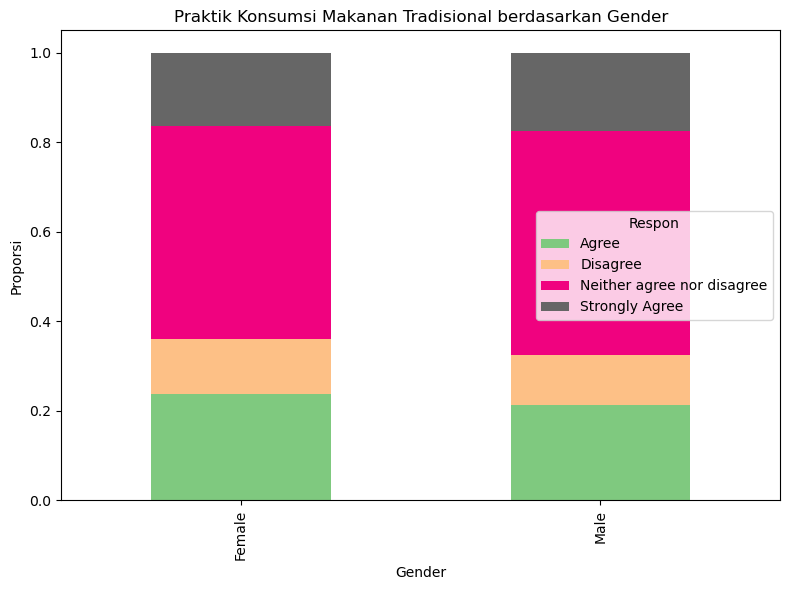

In [8]:
# Persentase konsumsi makanan tradisional berdasarkan gender
tradisional_by_gender = df_consumption.groupby('(B3) GENDER')['(E28) PRACTICE OF CONSUMING TRADITIONAL FOOD'].value_counts(normalize=True).unstack()

tradisional_by_gender.plot(kind='bar', stacked=True, figsize=(8,6), colormap='Accent')
plt.title('Praktik Konsumsi Makanan Tradisional berdasarkan Gender')
plt.ylabel('Proporsi')
plt.xlabel('Gender')
plt.legend(title='Respon')
plt.tight_layout()
plt.show()


In [9]:
# Contoh: ganti df_consumption dengan nama dataframe kamu
def clean_column_names(df):
    new_columns = []
    for col in df.columns:
        # Hapus bagian dalam tanda kurung seperti (A1) atau (E27 TYPE...
        col_clean = re.sub(r'\(.*?\)', '', col)  # hapus (....)
        col_clean = re.sub(r'\s+', '_', col_clean.strip())  # ganti spasi dengan _
        col_clean = re.sub(r'[^a-zA-Z0-9_]', '', col_clean)  # hilangkan karakter selain alfanumerik dan _
        col_clean = col_clean.lower()  # opsional: lowercase semua
        new_columns.append(col_clean)
    df.columns = new_columns
    return df

# Terapkan ke dataframe konsumsi makanan
df_consumption = clean_column_names(df_consumption)

# Cek hasil
print(df_consumption.columns)


Index(['city', 'province', 'gender', 'age', 'religion', 'ethnic',
       'education_level', 'lived_in_urban_area', 'occupation', 'social_clas',
       'household_member', 'household_income', 'time_of_income_receipt',
       'household_expenditure', '_monthly_expenditure_for_food',
       'health_factor', 'price_factor', 'religious_value_in_type_of_food',
       'religious_value_in_eating_places',
       'religious_value_in_consumption_pattern',
       'custom_value_in_type_of_food', 'custom_value_in_eating_places',
       'custom_value_in_consumption_pattern',
       'practice_of_food_consumption_based_on_religious_rules',
       'practice_of_food_consumption_based_on_custom_rules',
       'buying_food_product_in_the_right_place_based_on_religious_rules',
       'e27_type_of_dishes_variation_based_on_religious_rules',
       'practice_of_consuming_traditional_food'],
      dtype='object')


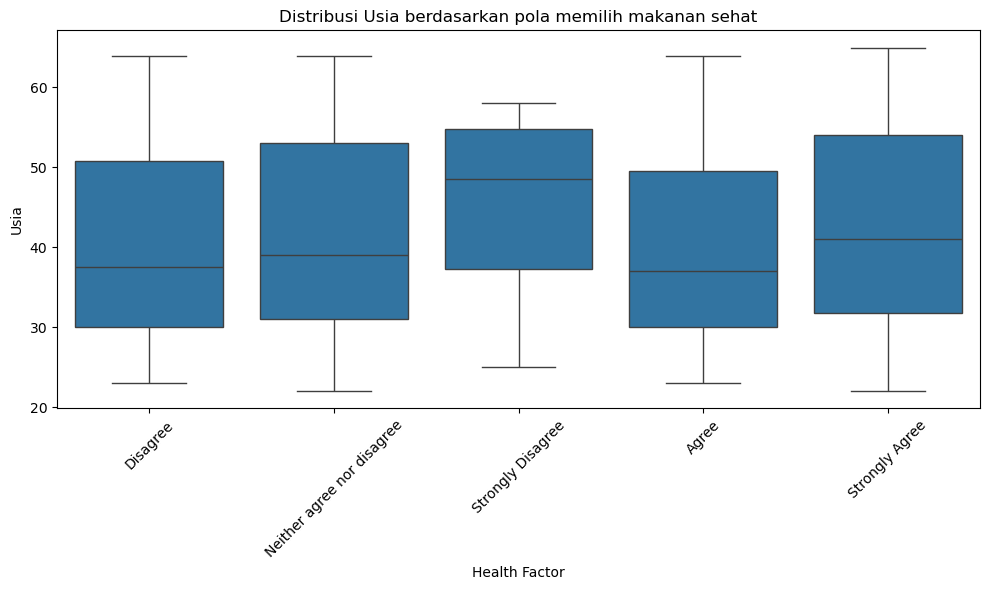

In [10]:
# Pastikan kolom sudah bersih
df_consumption = clean_column_names(df_consumption)

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_consumption, x='health_factor', y='age')
plt.title('Distribusi Usia berdasarkan pola memilih makanan sehat')
plt.xlabel('Health Factor')
plt.ylabel('Usia')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

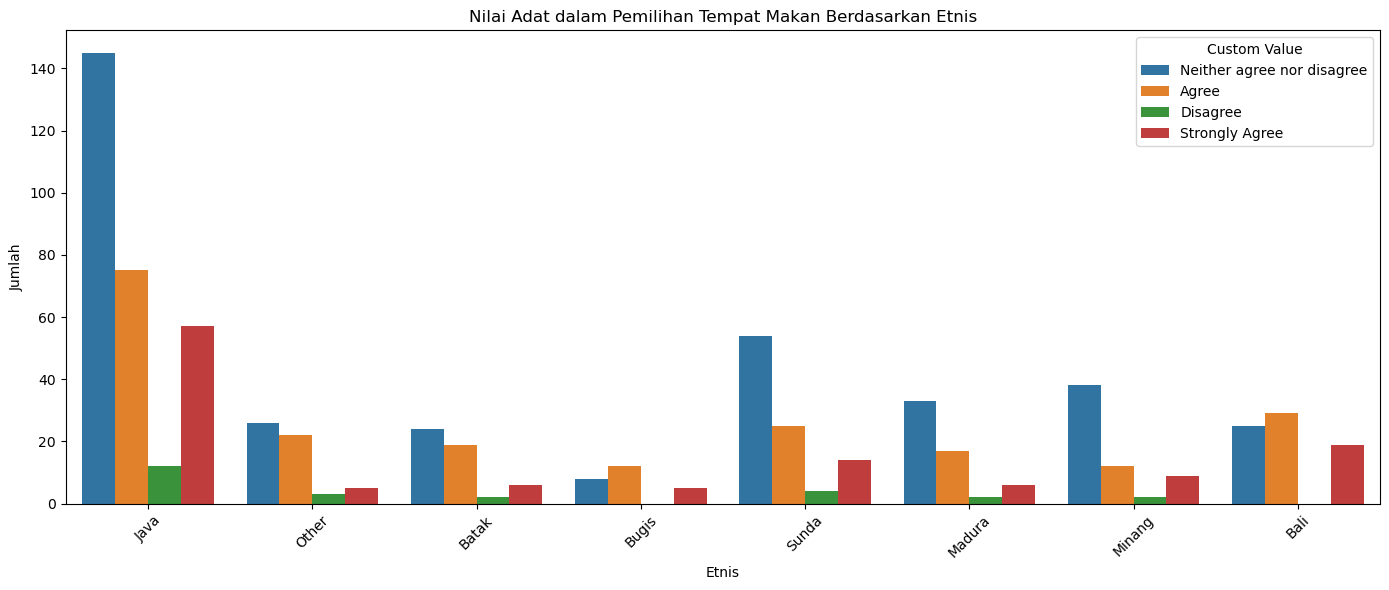

In [11]:
plt.figure(figsize=(14, 6))
sns.countplot(
    data=df_consumption,
    x='ethnic',
    hue='custom_value_in_eating_places'
)
plt.title('Nilai Adat dalam Pemilihan Tempat Makan Berdasarkan Etnis')
plt.xlabel('Etnis')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.legend(title='Custom Value')
plt.tight_layout()
plt.show()


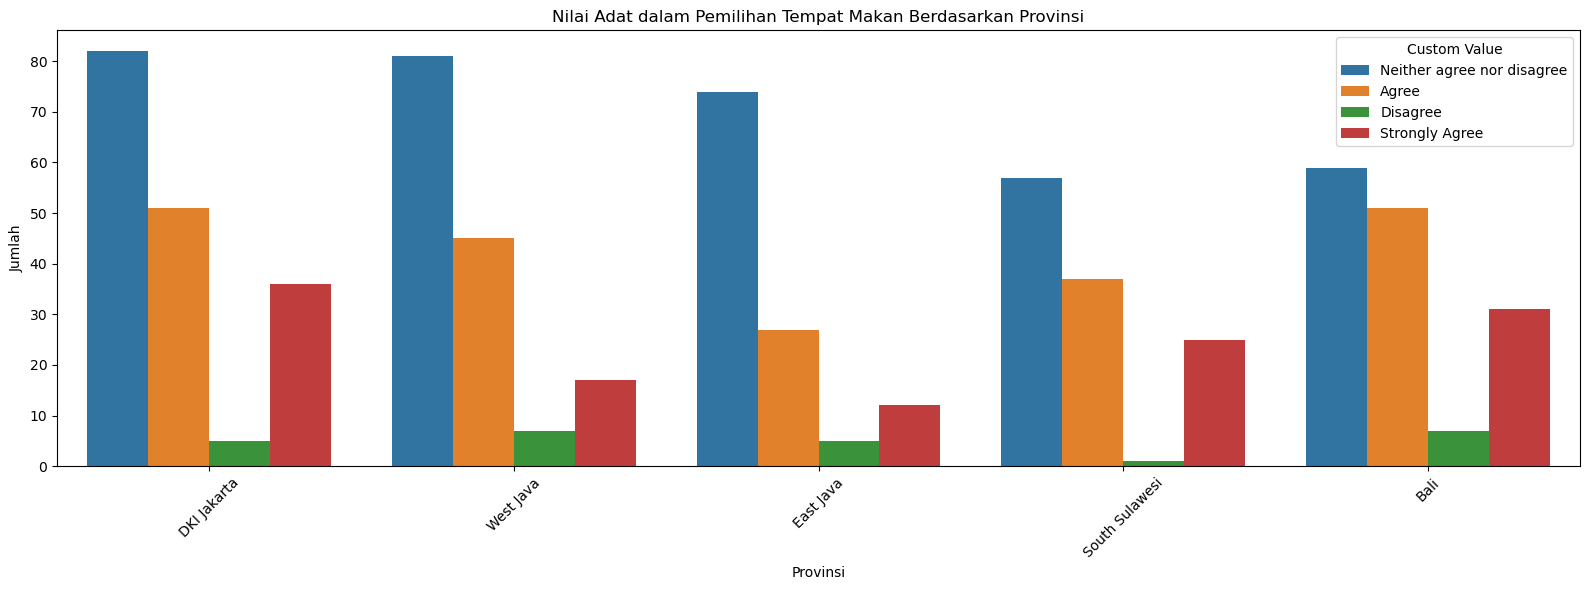

In [12]:
plt.figure(figsize=(16, 6))
sns.countplot(
    data=df_consumption,
    x='province',
    hue='custom_value_in_eating_places'
)
plt.title('Nilai Adat dalam Pemilihan Tempat Makan Berdasarkan Provinsi')
plt.xlabel('Provinsi')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.legend(title='Custom Value')
plt.tight_layout()
plt.show()


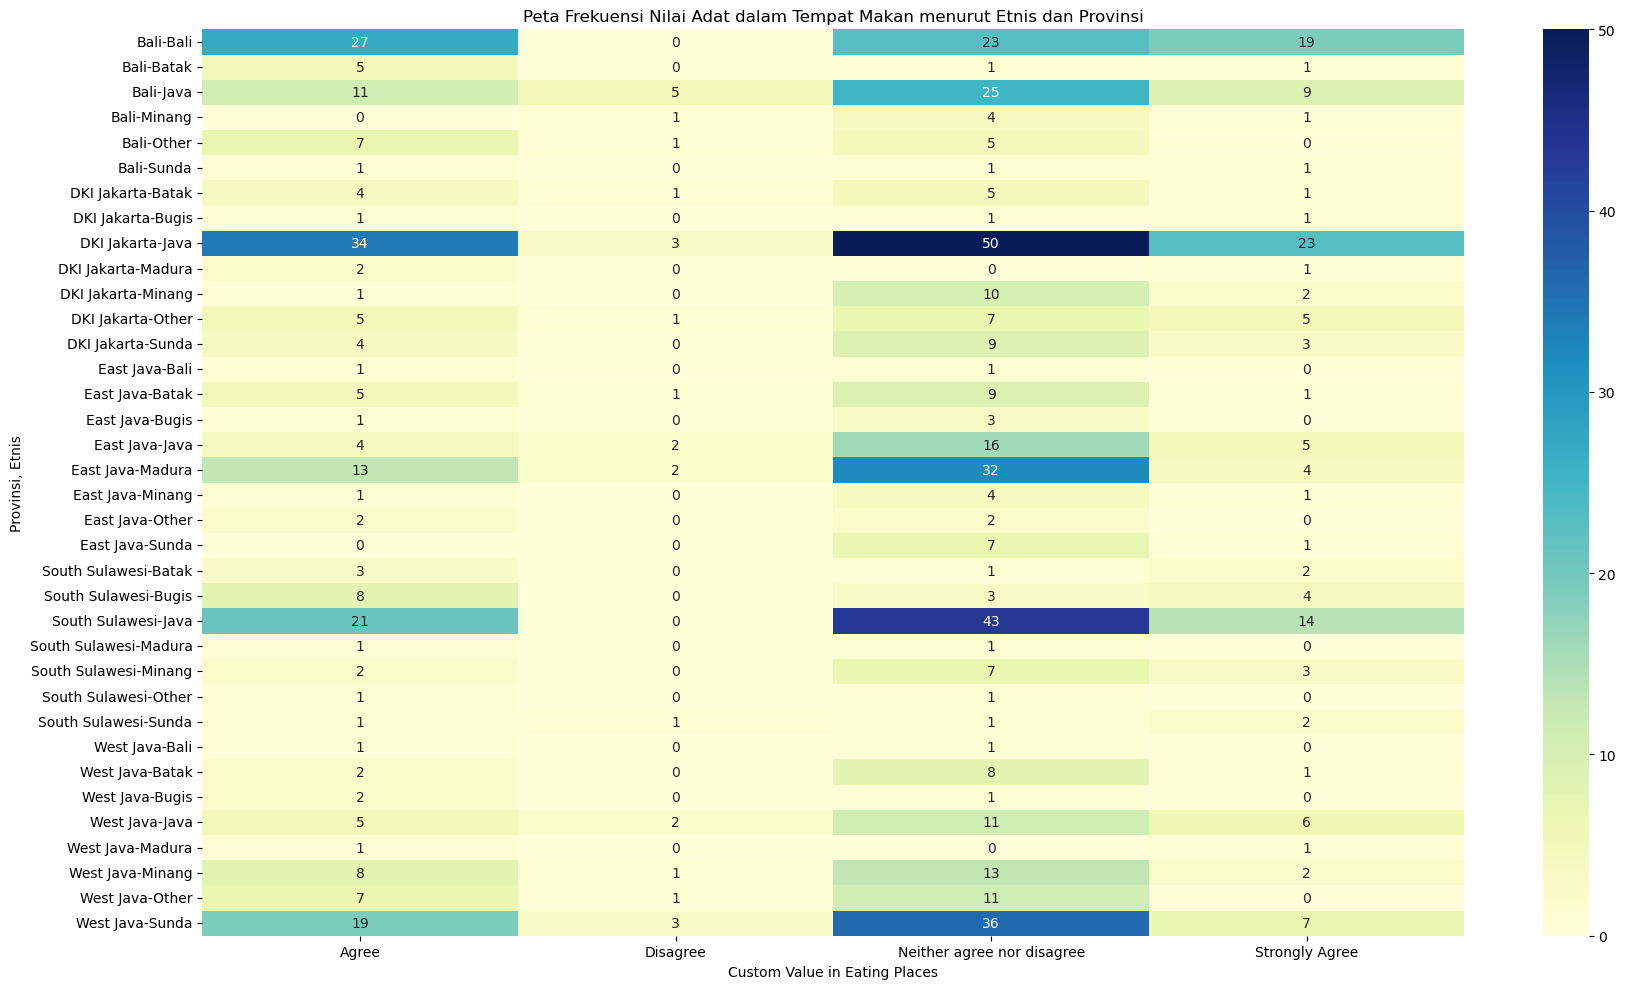

In [13]:
# Buat pivot table
pivot = pd.crosstab(
    [df_consumption['province'], df_consumption['ethnic']],
    df_consumption['custom_value_in_eating_places']
)

plt.figure(figsize=(18, 10))
sns.heatmap(pivot, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Peta Frekuensi Nilai Adat dalam Tempat Makan menurut Etnis dan Provinsi')
plt.ylabel('Provinsi, Etnis')
plt.xlabel('Custom Value in Eating Places')
plt.tight_layout()
plt.show()


In [14]:
df_consumption.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 710 entries, 0 to 709
Data columns (total 28 columns):
 #   Column                                                           Non-Null Count  Dtype 
---  ------                                                           --------------  ----- 
 0   city                                                             710 non-null    object
 1   province                                                         710 non-null    object
 2   gender                                                           710 non-null    object
 3   age                                                              710 non-null    int64 
 4   religion                                                         710 non-null    object
 5   ethnic                                                           710 non-null    object
 6   education_level                                                  710 non-null    object
 7   lived_in_urban_area                                  

In [15]:
# Ambil kolom yang dibutuhkan dan rename
df_consumption_selected = df_consumption[[
    'city',
    'gender',
    'age',
    'practice_of_consuming_traditional_food',
    'health_factor'
]].rename(columns={
    'practice_of_consuming_traditional_food': 'practice_traditional_food'
})

# Ubah tipe datanya
df_consumption_selected = df_consumption_selected.astype({
    'city': 'string',
    'gender': 'string',
    'age': 'int',
    'practice_traditional_food': 'string',
    'health_factor': 'string'
})

# Reset index biar rapi
df_consumption_selected = df_consumption_selected.reset_index(drop=True)

In [16]:
df_consumption_selected

,city,gender,age,practice_traditional_food,health_factor
0,Jakarta,Female,31,Agree,Disagree
1,Jakarta,Female,36,Strongly Agree,Neither agree nor disagree
2,Jakarta,Male,24,Neither agree nor disagree,Neither agree nor disagree
3,Jakarta,Female,63,Agree,Neither agree nor disagree
4,Jakarta,Male,43,Agree,Strongly Disagree
...,...,...,...,...,...
705,Denpasar,Female,64,Neither agree nor disagree,Neither agree nor disagree
706,Denpasar,Male,51,Neither agree nor disagree,Neither agree nor disagree
707,Denpasar,Male,26,Strongly Agree,Strongly Agree
708,Denpasar,Male,30,Strongly Agree,Strongly Agree


In [17]:
df_consumption_selected.to_csv('selected_consumption.csv', index=False)

In [ ]:
# Ambil kolom yang dibutuhkan dan rename
df_consumption_selected_2 = df_consumption[[
    'city',
    'gender',
    'age',
    'practice_of_consuming_traditional_food',
    'health_factor'
]].rename(columns={
    'practice_of_consuming_traditional_food': 'practice_traditional_food'
})

# Ubah tipe datanya
df_consumption_selected = df_consumption_selected.astype({
    'city': 'string',
    'gender': 'string',
    'age': 'int',
    'practice_traditional_food': 'string',
    'health_factor': 'string'
})

# Reset index biar rapi
df_consumption_selected = df_consumption_selected.reset_index(drop=True)